## Previsão de cancelamento (churn) bancário a fim de realizar ações preventivas
 - Projeto de Disciplina - Redes neurais com TensorFlow [25E3_2]
 - Aluna: Rosana Ribeiro Lima
 - Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

------
### Pitch de negócio

##### Problema:

Com frequência, diversas empresas perdem receitas por cancelamento de clientes insatisfeitos, sejam empresas de telecomunicações, de streaming, bancos, entre outras. Sabe-se que o custo da aquisição de um novo cliente é maior do que o custo de manutenção dos clientes atuais (ações de marketing, campanhas, ações promocionais, etc). Mas muitas vezes, esse acompanhamento e monitoramento da saúde do relacionamento com o cliente é algo difícil.

Seria útil para as empresas se elas pudessem saber previamente quais clientes estão mais propensos ao cancelamento de um serviço, para que assim possam realizar ações preventivas mais direcionadas a esse cliente.

##### Solução proposta:
A solução proposta por este trabalho visa analisar o dataset em questão e utilizá-lo como base para criar um modelo de redes neurais que permita identificar a probabilidade de cancelamento do serviço (churn) pelo cliente, com base em dados fornecidos pela empresa. A ideia e o objetivo é treinar um modelo sensível aos clientes com tendência ao cancelamento (construir um modelo com alto recall) para então fornecer a inferência de dados por meio de uma API que a empresa possa consultar sempre que desejado (por exemplo, uma vez ao mês). Assim, sempre que a API retornar que o cliente tem alta chance de cancelamento, a empresa poderá tomar as ações que julgar necessárias para tentar evitar tal cancelamento, como o fornecimento de serviços ou benefícios adicionais, o contato para colheita de feedbacks, a entrega de brindes, entre outros. 



In [36]:
import os
import pandas as pd
import numpy as np

path = "../data/"
df = pd.read_csv(os.path.join(path, "Customer-Churn-Records.csv"))
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [37]:

df = df.drop_duplicates(subset='CustomerId', keep='first') # limpar duplicatas, se houver
df.shape

(10000, 18)

In [38]:
# transformar dados string para numero
# transformar categoricas
# ver quantos paises tem... tratar
# verificar outliers... tratar (se houver mas forem poucos, remover)



In [39]:
df = df.drop(['CustomerId','RowNumber','Surname'], axis=1)
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [40]:
df.info() # aqui, verificamos que não há dados nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [41]:
print(df['Geography'].value_counts())
print('-------------')
print(df['Gender'].value_counts())
print('-------------')
print(df['HasCrCard'].value_counts())
print('-------------')
print(df['IsActiveMember'].value_counts())
print('-------------')
print(df['Complain'].value_counts())


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
-------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64
-------------
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
-------------
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
-------------
Complain
0    7956
1    2044
Name: count, dtype: int64


In [42]:
print('-------------')
print(df['Card Type'].value_counts())
print('-------------')
print(df['Satisfaction Score'].value_counts())
print('-------------')
print(df['Exited'].value_counts())




-------------
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
-------------
Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64
-------------
Exited
0    7962
1    2038
Name: count, dtype: int64


In [43]:
colunas_categoricas = ['Card Type', 'Geography', 'Gender']
df = pd.get_dummies(df, columns=colunas_categoricas, drop_first=False, dtype=int)


df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [44]:
df.shape

(10000, 21)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Card Type_DIAMOND   10000 non-null  int64  
 13  Card Type_GOLD      10000 non-null  int64  
 14  Card Type_PLATINUM  10000 non-null  int64  
 15  Card Type_SILVER    10000 non-null  int64  
 16  Geogr

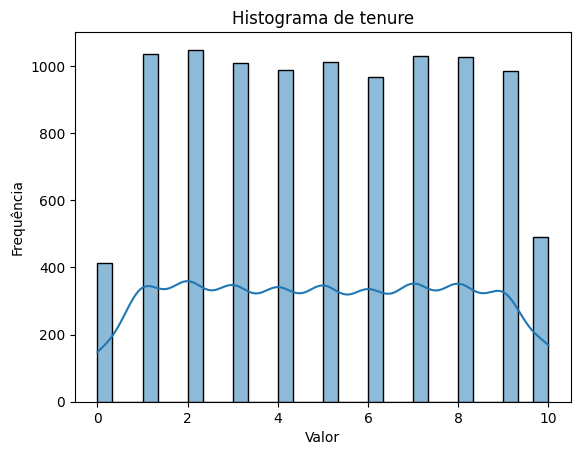

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Card Type_DIAMOND   10000 non-null  int64  
 13  Card Type_GOLD      10000 non-null  int64  
 14  Card Type_PLATINUM  10000 non-null  int64  
 15  Card Type_SILVER    10000 non-null  int64  
 16  Geogr

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Tenure'], bins=30, kde=True)
plt.title('Histograma de tenure')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()
print(df.info())


In [ ]:
df['Exited'].value_counts() # esse é o target

Exited
0    7962
1    2038
Name: count, dtype: int64

In [49]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,0,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,1,0,0,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,0,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,0,1,0,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,1,0,0,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,0,0,1,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,0,0,0,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,0,1,0,0,0,1,0,0,1


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


X = df.drop('Exited', axis=1)
y = df['Exited']

# Primeiro, separe os dados de treino (70%) e um conjunto temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=34, stratify=y)

# Agora, divida o conjunto temporário em validação (15%) e teste (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=34, stratify=y_temp)

print(f"Formato dos dados de treino: {X_train.shape}")
print(f"Formato dos dados de validação: {X_val.shape}")
print(f"Formato dos dados de teste: {X_test.shape}")

Formato dos dados de treino: (7000, 20)
Formato dos dados de validação: (1500, 20)
Formato dos dados de teste: (1500, 20)


In [52]:
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from keras import layers

scaler = RobustScaler()

# Ajuste o scaler com os dados de treino e transforme-os
X_train_scaled = scaler.fit_transform(X_train)

# Transforme os dados de validação e teste com o scaler já ajustado
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(2)}



# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     tf.keras.layers.Dropout(0.2),  # Ajuda a prevenir overfitting
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='RMSprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])



inputs = tf.keras.Input(shape=(X_train_scaled.shape[1],))

# Camadas intermediárias
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.1)(x)

# Saída
outputs = layers.Dense(1, activation='sigmoid')(x)

# Modelo final
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_classifier")


model_name = f'Churn_Predictor'
my_net = tf.keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()


# TRAINING THE MODEL
# optimizer = tensorflow.keras.optimizers.RMSProp(learning_rate=lr)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
my_net.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
# es = tensorflow.keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', patience=1000)
history = my_net.fit(X_train_scaled, y_train, batch_size=X.shape[0], epochs=200, validation_data=(X_val_scaled, y_val),class_weight=class_weights, verbose=1) # , callbacks=[es])


# # Treinando o modelo com os pesos de classe
# history = model.fit(X_train_scaled, y_train,
#                     epochs=100,
#                     batch_size=X.shape[0],
#                     validation_data=(X_val_scaled, y_val),
#                     class_weight=class_weights,
#                     verbose=1) 



# Fazendo previsões no conjunto de teste
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int) # Convertendo probabilidades em classes (0 ou 1). 
# Como a sensibilidade para os clientes propensos ao cancelamento é importante, podemos colocar o limiar um pouco abaixo de 0.5.

# Calculando as métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Relatório de classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

2025-08-05 09:41:37.839878: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-05 09:41:37.841249: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-05 09:41:37.845620: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-05 09:41:37.855019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754397697.872779   63552 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754397697.87

Model: "Churn_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7780 - loss: 0.6978 - recall: 0.0841 - val_accuracy: 0.8133 - val_loss: 0.5916 - val_recall: 0.7344
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7736 - loss: 0.6194 - recall: 0.6608 - val_accuracy: 0.7820 - val_loss: 0.5740 - val_recall: 0.8885
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.7601 - loss: 0.5684 - recall: 0.8781 - val_accuracy: 0.8127 - val_loss: 0.5233 - val_recall: 0.9082
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8009 - loss: 0.5140 - recall: 0.9110 - val_accuracy: 0.8607 - val_loss: 0.4491 - val_recall: 0.8951
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8471 - loss: 0.4532 - recall: 0.8970 - val_accuracy: 0.8980 - val_loss: 0.3687 - val_recall: 0.8885
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8800 - loss: 0.4025 - recall: 0.8725 - val_accuracy: 0.9173 - val_loss: 0.3010 - val_recall: 0.8885
Epoch 7/200
1/1 ━

In [53]:
# === AVALIAÇÃO ===

y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
Acurácia: 0.9993
Precisão: 0.9967
Recall: 1.0000

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1194
           1       1.00      1.00      1.00       306

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



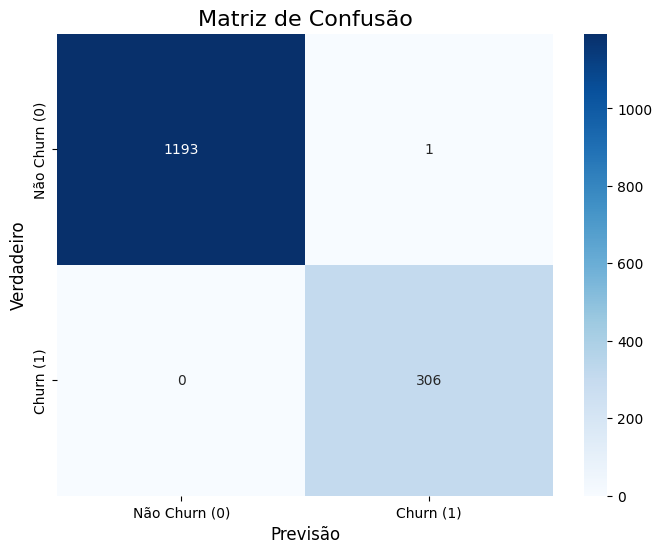

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Calcular a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# 2. Criar o Gráfico (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn (0)', 'Churn (1)'],
            yticklabels=['Não Churn (0)', 'Churn (1)'])

# Adicionar títulos e rótulos para clareza
plt.title('Matriz de Confusão', fontsize=16)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xlabel('Previsão', fontsize=12)
plt.show()

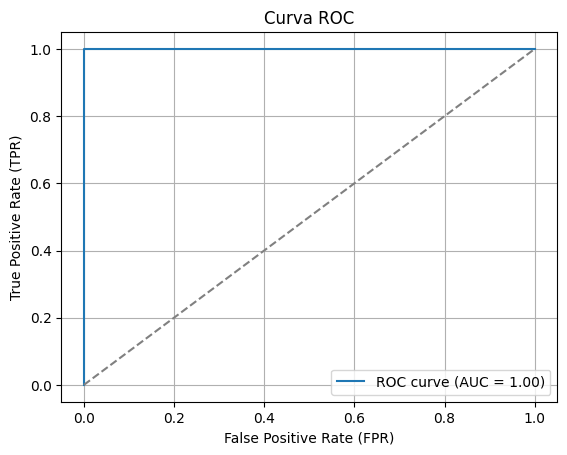

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular a área sob a curva (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha aleatória (baseline)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Referências

